### Task 1
Suponga que usted está trabajando en la industria relacionada con meteorología, por lo cual le interesa saber la probabilidad de que haya N huracanes este año. Se sabe que la frecuencia histórica de huracanes es 7 por año, en otras palabras, el número promedio de huracanes por año es de 7.

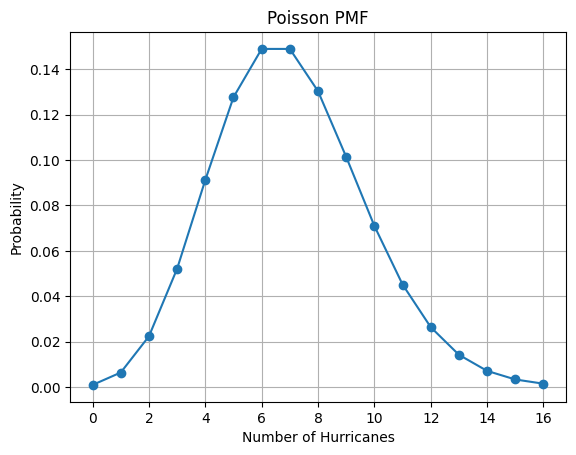

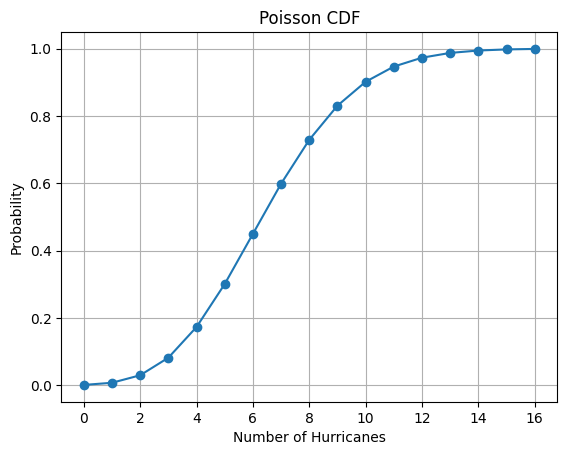

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular la PMF de una distribución binomial
def poissonPMF(n, lambdaParam):
    return np.exp(-lambdaParam) * np.power(lambdaParam, n) / np.math.factorial(n)

# Función para calcular la CDF de una distribución binomial
def poissonCDF(n, lambdaParam):
    cdf = np.zeros(n + 1)

    for i in range(n + 1):
        j = np.arange(0, i + 1)
        cdf[i] = np.sum([poissonPMF(k, lambdaParam) for k in j])

    return cdf

# Parámetros
lambdaParam = 7
maxHurricanes = 16

# Crear un arreglo con los valores de x
x = np.arange(0, maxHurricanes + 1)

# Graficar la PMF con un máximo de 16 huracanes
y = [poissonPMF(i, lambdaParam) for i in x]
plt.plot(x, y, 'o-')
plt.title('Poisson PMF')
plt.xlabel('Number of Hurricanes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

# Graficar la CDF con un máximo de 16 huracanes
y = poissonCDF(maxHurricanes, lambdaParam)
plt.plot(x, y, 'o-')
plt.title('Poisson CDF')
plt.xlabel('Number of Hurricanes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

**¿Es este un escenario que se pueda modelar como una variable aleatoria de Poisson? ¿Por qué?**

Si, es un escenario que se puede modelar como una variable aleatoria de Poisson ya que se trata de un evento que tiene una frecuencia conocida de 7 al año. 


**¿Qué conclusiones puede sacar al observar las gráficas de los ejercicios anteriores?**

TODO



### Task 2
Usted es un analista de simulación encargado de modelar la llegada de clientes a una tienda minorista. Desea simular la cantidad de clientes que llegan por hora utilizando dos métodos diferentes: el método de transformación inversa y el método de rechazo.

### Task 2.1
Defina la distribución de probabilidad objetivo para las llegadas de clientes en función de los datos históricos. Supongamos que ha recopilado datos y descubrió que la cantidad de clientes que llegan por hora sigue una distribución de Poisson con un promedio de 10 clientes por hora (λ = 10).

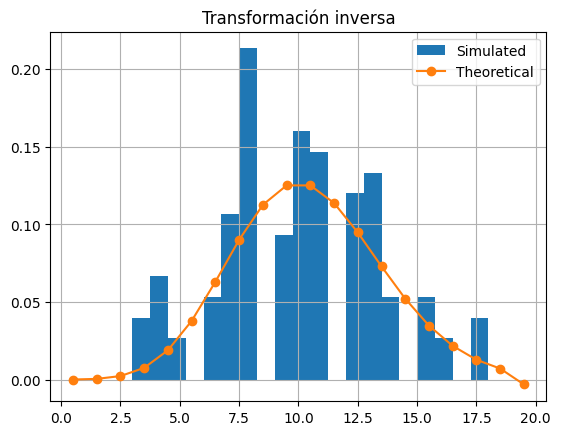

Media de la muestra generada: 9.91 (Teórico: 10)
Varianza de la muestra generada: 11.48 (Teórico: 10)


In [29]:
def poissonInverseTransform(n, lambdaParam):
    sample = np.random.uniform(size=n)
    x = np.zeros_like(sample)

    for i, rand in enumerate(sample):
        probability = 0
        k = 0

        while probability < rand:
            probability += poissonPMF(k, lambdaParam)
            k += 1
        
        x[i] = k - 1

    return x

# Parametros
lambdaParam = 10
n = 100 #TODO crashea con 1000

# Valores simulados
y = poissonInverseTransform(n, lambdaParam)
mean = np.mean(y)
var = np.var(y)
plt.hist(y, bins=20, density=True, label='Simulated')

# Valores teoricos
x = np.arange(0, 20)
y = [poissonPMF(i, lambdaParam) for i in x]
plt.plot(x + 0.5, y, 'o-', label='Theoretical')

plt.legend()
plt.grid(True)
plt.title("Transformación inversa")
plt.show()

print(f"Media de la muestra generada: {mean:.2f} (Teórico: {lambdaParam})")
print(f"Varianza de la muestra generada: {var:.2f} (Teórico: {lambdaParam})")

### Task 2.2
Defina una distribución de propuesta que sea más fácil de muestrear y que cubra el soporte de la distribución de Poisson de destino. Por ejemplo, puede elegir una distribución uniforme o geométrica.

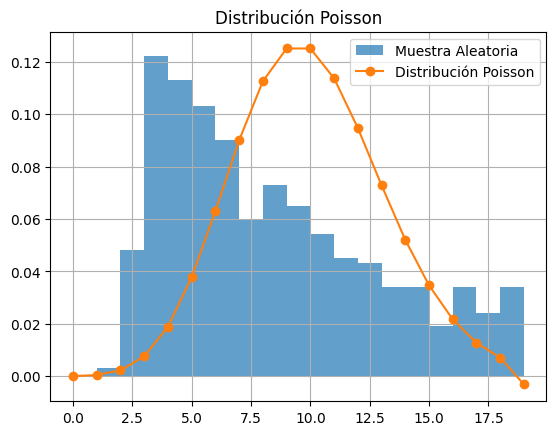

Media de la muestra generada: 7.92 (Teórico: 10)
Varianza de la muestra generada: 20.26 (Teórico: 10)


In [30]:
def geometricPMF(n, p):
    return (1 - p) ** n * p

def rejectionSampling(lambdaParam, n):
    p = 1 / lambdaParam 
    samples = []
    while True:
        y = np.random.geometric(p) - 1
        u = np.random.uniform()
        if u < poissonPMF(y, lambdaParam) / (p * geometricPMF(y, p)):
            samples.append(y)

        if len(samples) == n:
            break

    return samples

lambdaParam = 10
n = 1000

# Valores simulados
samples = rejectionSampling(lambdaParam, n)
y = np.arange(0, 20)
mean = np.mean(samples)
var = np.var(samples)
plt.hist(samples, bins=y, density=True, alpha=0.7, label='Muestra Aleatoria')

# Valores teóricos
pmfValues = [poissonPMF(i, lambdaParam) for i in y]
plt.plot(y, pmfValues, '-o', label='Distribución Poisson')

plt.legend()
plt.grid(True)
plt.title('Distribución Poisson')
plt.show()

print(f"Media de la muestra generada: {mean:.2f} (Teórico: {lambdaParam})")
print(f"Varianza de la muestra generada: {var:.2f} (Teórico: {lambdaParam})")